In [1]:
import pandas
import numpy
from scipy.stats import binom
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

In [2]:
url = ('https://github.com/dhesse/IN-STK5000-Autumn21'
       '/raw/main/compas-scores-two-years.csv.gz')
data = pandas.read_csv(url)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [42]:
features = ['age', 'juv_misd_count', 'priors_count']
target = 'two_year_recid'
X = data[features]
y = data[target]
cross_val_score(DecisionTreeClassifier(max_depth=5), X, y)

array([0.6950797 , 0.67290367, 0.63270963, 0.6950797 , 0.67822469])

In [43]:
model = DecisionTreeClassifier(max_depth=5).fit(X, y)

In [44]:
model.predict_proba([[30, 3, 0]])[0][0]

0.716304347826087

In [40]:
models = []
for _ in range(1000):
    sample = data.sample(data.shape[0], replace=True)
    models.append(DecisionTreeClassifier(max_depth=5).fit(sample[features], sample[target]))

(array([ 15.,  38., 101., 259., 263., 167.,  87.,  38.,  10.,   4.,   2.,
          0.,   0.,   0.,   0.,   3.,   3.,   0.,   0.,  10.]),
 array([0.65319426, 0.67053455, 0.68787484, 0.70521512, 0.72255541,
        0.7398957 , 0.75723598, 0.77457627, 0.79191656, 0.80925684,
        0.82659713, 0.84393742, 0.86127771, 0.87861799, 0.89595828,
        0.91329857, 0.93063885, 0.94797914, 0.96531943, 0.98265971,
        1.        ]),
 <BarContainer object of 20 artists>)

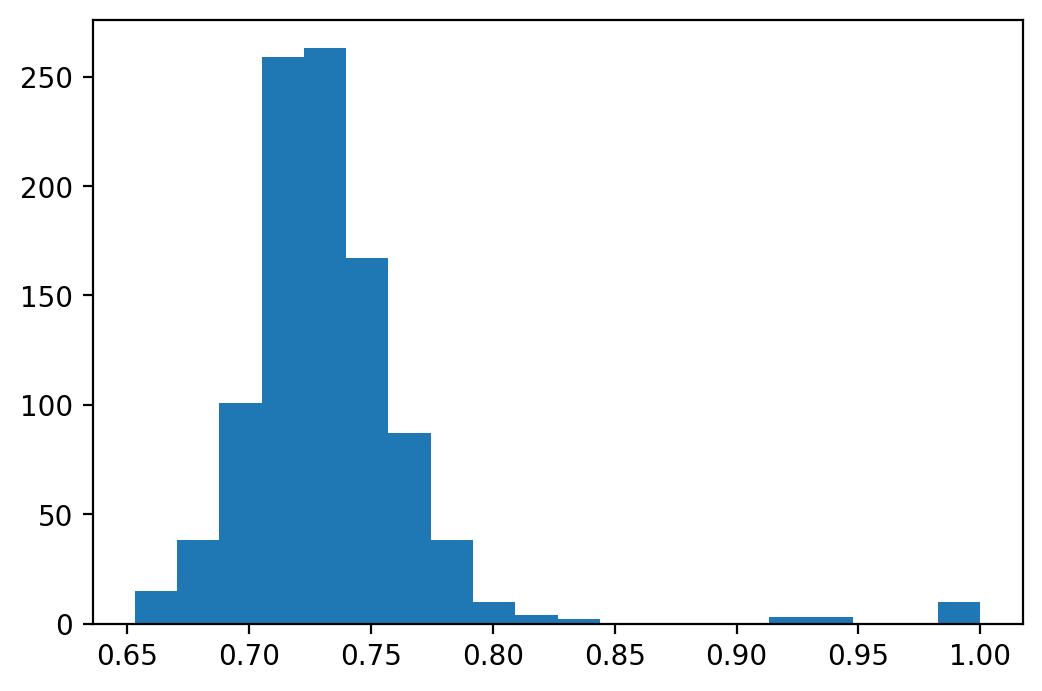

In [41]:
plt.hist([m.predict_proba([[30, 3, 0]])[0][0] for m in models], bins=20)